# 기계학습 homework 1
---
### 개요
본 과제에서는 기계학습에 필수적인 함수나 클래스의 의미와 사용법을 학습하는 것에 의의를 둡니다. 본 과제에서 수행하여야 할 문제는 다음과 같습니다.
1. 명시된 함수나 클래스의 주석을 작성하세요. (필수로 작성해야 하는 것 : 함수의 기능, 함수의 인풋, 함수의 아웃풋, 리스트에 명시되어있는 파라미터의 의미)
2. 명시된 함수나 클래스의 간단한 실행 코드를 작성하세요. (수업에서 제공하는 housing 데이터를 사용할 것)

### 과제를 위한 라이브러리
---
본 과제에서 사용하는 라이브러리는 수업에서 제공된 colab에 설치되어 있는 라이브러리와 동일한 버전을 사용합니다.

In [52]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 기본 모듈 임포트
import numpy as np
import os
import pandas as pd
import tarfile
import urllib

# 그래프 관련
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림 저장 위치 지정
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/liganega/handson-ml2/master/notebooks/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# tar 파일을 가져와서 지정된 폴더에 압축을 풀면 csv 파일 저장됨.
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [53]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

### 과제를 위한 참고 자료
---
1. [`sklearn docs`](https://scikit-learn.org/stable/index.html) : 사이킷런 참고자료
2. [`matplotlib docs`](https://matplotlib.org/stable/) : matplotlib 참고자료
3. [`pandas docs`](https://pandas.pydata.org/pandas-docs/stable/index.html) : 판다스 참고자료


### 제출방법
---
작성한 노트북 파일과 이를 편집한 pdf 파일(실행 사진과 주석)을 제출할 것

제출 파일 :

기계학습_homework_{회차}\_{학번}\_{이름}.ipynb,

기계학습_homework_{회차}\_{학번}\_{이름}.pdf


### 과제 리스트
---
```python
class pandas.DataFrame(data=None, index=None, columns=None)

class pandas.Series(data=None, index=None )

DataFrame.describe()

DataFrame.loc

DataFrame.iloc

DataFrame.values

DataFrame.corr()

DataFrame.isnull()

DataFrame.sum(axis=0)

DataFrame.drop(labels=None, axis=0, columns=None)

DataFrame.dropna(axis=0, inplace=False)

DataFrame.fillna(value=None, inplace=False)

DataFrame.replace(to_replace=None, inplace=False)

DataFrame.to_csv(path_or_buf=None, columns=None, header=True, index=True, index_label=None)

pandas.read_csv(filepath_or_buffer)

sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True)

class sklearn.model_selection.StratifiedShuffleSplit(n_splits= )

class sklearn.preprocessing.OneHotEncoder(sparse=False)

class sklearn.preprocessing.StandardScaler()

class sklearn.preprocessing.MinMaxScaler()

class sklearn.pipeline.Pipeline(steps)

matplotlib.pyplot.plot(x=, y=, kind=, style=, color=, alpha=)
```

### 예시
---

In [7]:
# 1번 : class pandas.DataFrame(data=None, index=None, columns=None)
################### 예제 코드(수업에서 사용한 housing 데이터 사용할 것) ###################
d = housing
df = pd.DataFrame(data=d)
df
################### dataframe 주석 ######################
'''
Lorem ipsum dolor sit amet, consectetur adipiscing elit.
Nunc hendrerit lectus eget mollis consectetur.
Donec blandit eu nunc id fringilla.
Vivamus vitae leo molestie tortor faucibus fringilla.
Mauris sit amet odio tortor. Mauris aliquam erat eu nisl gravida auctor.
Nam tristique urna sit amet lorem laoreet efficitur. Morbi et augue.
'''

'\nLorem ipsum dolor sit amet, consectetur adipiscing elit.\nNunc hendrerit lectus eget mollis consectetur.\nDonec blandit eu nunc id fringilla.\nVivamus vitae leo molestie tortor faucibus fringilla.\nMauris sit amet odio tortor. Mauris aliquam erat eu nisl gravida auctor.\nNam tristique urna sit amet lorem laoreet efficitur. Morbi et augue.\n'

In [8]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [13]:
'''
class pandas.Series(data=None, index=None)

Series 클래스는 1차원 배열 형태의 데이터를 다루기 위한 자료구조입니다.

Inputs:
- data: 시리즈에 저장할 데이터. 리스트, 배열 등이 가능합니다.
- index: 시리즈의 인덱스 이름

Outputs:
데이터와 인덱스 정보를 가지고 있는 Series 객체를 생성합니다.
'''

# Series 예제
s = pd.Series(data=housing['median_house_value'].values)
print(s.head())

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
dtype: float64


In [15]:
'''
DataFrame.describe()
describe() 메서드는 데이터프레임의 주요 통계 정보를 요약해서 보여줍니다.

Inputs:
describe 메서드는 인자를 받지 않습니다.

Outputs:
데이터프레임의 각 열에 대한 통계 정보를 담은 데이터프레임을 반환합니다.
(count, mean, std, min, 백분위수, max 값 등)
'''

# describe 예제
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [17]:
'''
DataFrame.loc
loc은 데이터프레임에서 인덱스 이름을 기준으로 행을 선택하기 위해 사용됩니다.

Inputs:
인덱스 이름, 또는 인덱스 이름의 리스트나 조건식 등으로 선택할 행을 지정합니다.

Outputs:
인덱스 이름으로 선택된 새로운 데이터프레임을 반환합니다.
'''

# loc 예제
print(housing.loc[:5, ['longitude', 'latitude', 'housing_median_age']])

   longitude  latitude  housing_median_age
0    -122.23     37.88                41.0
1    -122.22     37.86                21.0
2    -122.24     37.85                52.0
3    -122.25     37.85                52.0
4    -122.25     37.85                52.0
5    -122.25     37.85                52.0


In [19]:
'''
DataFrame.iloc
iloc는 데이터프레임에서 인덱스 번호를 기준으로 행을 선택하기 위해 사용됩니다.

Inputs:
정수 인덱스 번호, 또는 번호의 리스트나 조건식 등으로 선택할 행을 지정합니다.

Outputs:
정수 인덱스로 선택된 새로운 데이터프레임을 반환합니다.
'''

# iloc 예제
print(housing.iloc[5:10, 3:7])

   total_rooms  total_bedrooms  population  households
5        919.0           213.0       413.0       193.0
6       2535.0           489.0      1094.0       514.0
7       3104.0           687.0      1157.0       647.0
8       2555.0           665.0      1206.0       595.0
9       3549.0           707.0      1551.0       714.0


In [20]:
'''
DataFrame.values
values 속성은 데이터프레임의 데이터를 2차원 numpy 배열 형태로 반환합니다.

Inputs:
values 속성은 인자를 받지 않습니다.

Outputs:
데이터프레임의 데이터를 담고 있는 2차원 numpy 배열을 반환합니다.
'''

# values 예제
print(housing[['total_rooms', 'total_bedrooms']].values[:5])

[[ 880.  129.]
 [7099. 1106.]
 [1467.  190.]
 [1274.  235.]
 [1627.  280.]]


In [22]:
'''
DataFrame.corr()
corr() 메서드는 데이터프레임의 각 열 간 상관관계를 계산합니다.

Inputs:
corr 메서드는 인자를 받지 않습니다.

Outputs:
열 간 상관계수를 담은 새로운 데이터프레임을 반환합니다.
'''

# corr 예제
print(housing.corr())

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

<ipython-input-22-d9c4a9382626>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(housing.corr())


In [23]:
'''
DataFrame.isnull()
isnull() 메서드는 데이터프레임의 각 원소가 null인지 아닌지를 판별합니다.

Inputs:
isnull 메서드는 인자를 받지 않습니다.

Outputs:
데이터프레임과 같은 크기의 boolean 데이터프레임을 반환합니다.
각 원소가 null이면 True, 아니면 False가 저장됩니다.
'''

# isnull 예제
print(housing.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [24]:
'''
DataFrame.sum(axis=0)
sum() 메서드는 데이터프레임의 각 열 또는 행의 합을 계산합니다.

Inputs:
- axis: 합을 계산할 방향
    0 - 각 열의 합(기본값), 1 - 각 행의 합

Outputs:
합계 값을 담은 시리즈를 반환합니다.
'''

# sum 예제
print(housing.sum(axis=0))

longitude                                                    -2467918.7
latitude                                                      735441.62
housing_median_age                                             591119.0
total_rooms                                                  54402150.0
total_bedrooms                                               10990309.0
population                                                   29421840.0
households                                                   10310499.0
median_income                                                79890.6495
median_house_value                                         4269504061.0
ocean_proximity       NEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR BAYNEAR B...
dtype: object


In [25]:
'''
DataFrame.drop(labels=None, axis=0, columns=None)
drop() 메서드는 데이터프레임에서 특정 행이나 열을 제거합니다.

Inputs:
- labels: 제거할 행 인덱스 이름의 리스트
- columns: 제거할 열 이름의 리스트
- axis: labels에 행 인덱스를 넣을 경우 0(기본값), 열 이름을 넣을 경우 1

Outputs:
선택한 행 또는 열이 제거된 새로운 데이터프레임을 반환합니다.
'''

# drop 예제
print(housing.drop(columns=['median_house_value','ocean_proximity']))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  
0   

In [26]:
'''
DataFrame.dropna(axis=0, inplace=False)
dropna() 메서드는 널 값을 가진 행이나 열을 제거합니다.

Inputs:
- axis: 행을 기준으로 삭제할 경우 0(기본값), 열을 기준으로 할 경우 1
- inplace: True이면 원본 데이터프레임을 변경, False이면 새로운 데이터프레임 반환(기본값)

Outputs:
널 값이 있는 행 또는 열이 제거된 데이터프레임을 반환합니다.
'''

# dropna 예제
print(housing.dropna(subset=['total_bedrooms']))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [27]:
'''
DataFrame.fillna(value=None, inplace=False)
fillna() 메서드는 널 값을 다른 값으로 대체합니다.

Inputs:
- value: 널 값을 대체할 값. 스칼라 또는 딕셔너리 형태로 각 열마다 다른 값 지정 가능
- inplace: True이면 원본 데이터프레임 변경, False이면 새 데이터프레임 반환(기본값)

Outputs:
널 값을 대체한 데이터프레임을 반환합니다.
'''

# fillna 예제
print(housing.fillna(value=housing.mean()))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

<ipython-input-27-574eaaf52d9e>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(housing.fillna(value=housing.mean()))


In [28]:
'''
DataFrame.replace(to_replace=None, inplace=False)
replace() 메서드는 데이터프레임의 특정 값을 다른 값으로 대체합니다.

Inputs:
- to_replace: 대체될 값. 딕셔너리 형태로 각 열마다 다른 값 지정 가능
- inplace: True이면 원본 데이터프레임 변경, False이면 새 데이터프레임 반환(기본값)

Outputs:
지정한 값이 대체된 데이터프레임을 반환합니다.
'''

# replace 예제
print(housing.replace({'ocean_proximity': {'ISLAND': 'NEAR BAY'}}))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [29]:
'''
DataFrame.to_csv(path_or_buf=None, columns=None, header=True, index=True, index_label=None)
to_csv() 메서드는 데이터프레임을 CSV 파일로 저장합니다.

Inputs:
- path_or_buf: CSV 파일 경로
- columns: 저장할 열 이름의 리스트. None이면 모든 열 저장(기본값)
- header: 열 이름을 헤더에 쓸지 여부(기본값 True)
- index: 행 인덱스를 파일에 쓸지 여부(기본값 True)
- index_label: 행 인덱스 이름. None이면 인덱스 이름 생략(기본값)

Outputs:
CSV 파일로 데이터프레임을 저장합니다.
'''

# to_csv 예제
housing.to_csv('./housing.csv', columns=[
    'longitude', 'latitude', 'housing_median_age',
    'total_rooms', 'total_bedrooms', 'population',
    'households', 'median_income', 'median_house_value'])


In [51]:
'''
pandas.read_csv(filepath_or_buffer)
read_csv() 함수는 CSV 파일에서 데이터를 읽어와 데이터프레임을 생성합니다.

Inputs:
- filepath_or_buffer: 읽어올 CSV 파일 경로

Outputs:
CSV 파일에서 읽은 데이터로 생성한 데이터프레임을 반환합니다.
'''

# read_csv 예제
housing_ = pd.read_csv('./housing.csv')
print(housing_.head())

   Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0           0    -122.23     37.88                41.0        880.0   
1           1    -122.22     37.86                21.0       7099.0   
2           2    -122.24     37.85                52.0       1467.0   
3           3    -122.25     37.85                52.0       1274.0   
4           4    -122.25     37.85                52.0       1627.0   

   total_bedrooms  population  households  median_income  median_house_value  
0           129.0       322.0       126.0         8.3252            452600.0  
1          1106.0      2401.0      1138.0         8.3014            358500.0  
2           190.0       496.0       177.0         7.2574            352100.0  
3           235.0       558.0       219.0         5.6431            341300.0  
4           280.0       565.0       259.0         3.8462            342200.0  


In [36]:
'''
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True)
train_test_split() 함수는 데이터를 학습용과 평가용으로 분할합니다.

Inputs:
- *arrays: 분할할 데이터. 여러 개의 배열을 동시에 분할할 수 있음
- test_size: 테스트 데이터 비율 혹은 갯수(기본값 0.25)
- train_size: 학습 데이터 비율 혹은 갯수(기본값 test_size의 나머지)
- random_state: 데이터 분할시 셔플에 사용할 랜덤 시드값
- shuffle: 분할 전 데이터를 섞을지 여부(기본값 True)

Outputs:
크기에 맞게 분할된 학습/테스트 데이터 배열의 리스트를 반환합니다.
(X_train, X_test, y_train, y_test 순서)
'''
import sklearn.model_selection
# train_test_split 예제
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value'].copy()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16512 4128 16512 4128


In [55]:
'''
class sklearn.model_selection.StratifiedShuffleSplit(n_splits=)
StratifiedShuffleSplit 클래스는 계층화 샘플링을 사용하여 데이터를 분할하는 데 사용됩니다.

Parameters:
- n_splits: 분할 횟수

Methods:
- split(X, y): 주어진 데이터 X,y를 계층별로 학습/테스트 세트로 분할하는 train/test 인덱스 생성
'''
from sklearn.model_selection import StratifiedShuffleSplit
# StratifiedShuffleSplit 예제
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['ocean_proximity']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

print(strat_train_set['ocean_proximity'].value_counts() / len(strat_train_set))
print(strat_test_set['ocean_proximity'].value_counts() / len(strat_test_set))

<1H OCEAN     0.442648
INLAND        0.317406
NEAR OCEAN    0.128755
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64
<1H OCEAN     0.442587
INLAND        0.317345
NEAR OCEAN    0.128876
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64


In [54]:
'''
class sklearn.preprocessing.OneHotEncoder(sparse=False)
OneHotEncoder 클래스는 범주형 변수를 One-Hot 인코딩으로 변환합니다.

Parameters:
- sparse: 희소행렬(sparse matrix)로 결과를 반환할지 여부(기본값 False)

Methods:
- fit(X): 인코딩에 필요한 정보를 데이터로부터 학습함
- transform(X): 학습된 정보를 사용하여 데이터를 인코딩함
- fit_transform(X): 데이터를 학습하여 정보를 얻은 후 바로 인코딩함
'''

# OneHotEncoder 예제
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing[['ocean_proximity']])
print(housing_cat_1hot.toarray())

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [43]:
'''
class sklearn.preprocessing.StandardScaler()
StandardScaler 클래스는 연속형 변수의 스케일을 평균 0, 분산 1이 되도록 변환합니다.

Methods:
- fit(X): 스케일링에 필요한 평균, 표준편차 정보를 데이터로부터 학습함
- transform(X): 학습된 정보를 사용하여 데이터를 스케일링함
- fit_transform(X): 데이터를 학습하여 정보를 얻은 후 바로 스케일링함
'''

# StandardScaler 예제
from sklearn.preprocessing import StandardScaler
num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
               'total_bedrooms', 'population', 'households', 'median_income']
scaler = StandardScaler()
scaled_housing_num = scaler.fit_transform(housing[num_attribs])
print(scaled_housing_num)

[[-1.32783522  1.05254828  0.98214266 ... -0.9744286  -0.97703285
   2.34476576]
 [-1.32284391  1.04318455 -0.60701891 ...  0.86143887  1.66996103
   2.33223796]
 [-1.33282653  1.03850269  1.85618152 ... -0.82077735 -0.84363692
   1.7826994 ]
 ...
 [-0.8237132   1.77823747 -0.92485123 ... -0.3695372  -0.17404163
  -1.14259331]
 [-0.87362627  1.77823747 -0.84539315 ... -0.60442933 -0.39375258
  -1.05458292]
 [-0.83369581  1.75014627 -1.00430931 ... -0.03397701  0.07967221
  -0.78012947]]


In [47]:
'''
class sklearn.preprocessing.MinMaxScaler()
MinMaxScaler 클래스는 연속형 변수의 스케일을 0과 1 사이 값으로 변환합니다.

Methods:
- fit(X): 스케일링에 필요한 최대/최소값 정보를 데이터로부터 학습함
- transform(X): 학습된 정보를 사용하여 데이터를 스케일링함
- fit_transform(X): 데이터를 학습하여 정보를 얻은 후 바로 스케일링함
'''
# MinMaxScaler 예제
from sklearn.preprocessing import MinMaxScaler
num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
               'total_bedrooms', 'population', 'households', 'median_income']
min_max_scaler = MinMaxScaler()
scaled_housing_num = min_max_scaler.fit_transform(housing[num_attribs])
print(scaled_housing_num)


[[0.21115538 0.5674814  0.78431373 ... 0.00894083 0.02055583 0.53966842]
 [0.21215139 0.565356   0.39215686 ... 0.0672104  0.18697583 0.53802706]
 [0.21015936 0.5642933  1.         ... 0.01381765 0.02894261 0.46602805]
 ...
 [0.31175299 0.73219979 0.31372549 ... 0.0281398  0.07104095 0.08276438]
 [0.30179283 0.73219979 0.33333333 ... 0.02068444 0.05722743 0.09429525]
 [0.30976096 0.72582359 0.29411765 ... 0.03879032 0.08699227 0.13025338]]


In [48]:
'''
class sklearn.pipeline.Pipeline(steps)
Pipeline 클래스는 데이터 전처리와 모델 학습/예측 과정을 연결하여 자동화합니다.

Parameters:
- steps: ('이름', 변환기 또는 추정기) 쌍의 리스트. 마지막 단계는 추정기여야 함

Methods:
- fit(X, y): 파이프라인의 모든 변환기의 fit(), fit_transform() 메서드를 순서대로 호출한 후,
             마지막 추정기의 fit() 메서드를 호출하여 전체 파이프라인을 학습시킵니다.
- predict(X): 파이프라인의 모든 변환기의 transform() 메서드를 순서대로 호출하여 데이터를 변환한 후,
              마지막 추정기의 predict() 메서드를 호출하여 예측값을 반환합니다.
- score(X, y): 파이프라인의 모든 변환기의 transform() 메서드를 호출하여 데이터를 변환한 후,
               마지막 추정기의 score() 메서드를 호출하여 예측 성능을 평가합니다.
'''

# Pipeline 예제
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing[num_attribs])

model = LinearRegression()
model.fit(housing_num_tr, housing['median_house_value'])

LinearRegression()

그림 저장: housing_plot


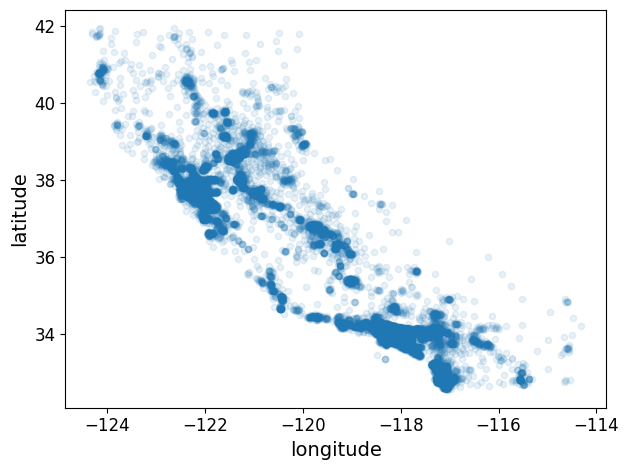

In [49]:
'''
matplotlib.pyplot.plot(x=, y=, kind=, style=, color=, alpha=)
plot() 함수는 선 그래프, 산점도 등 다양한 유형의 그래프를 생성합니다.

Inputs:
- x: x축 데이터
- y: y축 데이터
- kind: 그래프 유형 (line, scatter, bar 등)
- style: 마커 및 선 스타일
- color: 마커 및 선 색상
- alpha: 마커 및 선 투명도 (0~1 사이 값)

Outputs:
설정에 맞는 그래프를 생성하여 화면에 출력합니다.
'''

# plot 예제
housing.plot(x='longitude', y='latitude',
             kind='scatter', alpha=0.1)
save_fig('housing_plot')

In [50]:
housing

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0
